## Spline Regrsion in Python

With codes for spline regression in Python, we discuss the algorithm with respect to the change of parameters.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
### function for performing spline regression
def spline(x, y, p, penalty, support=[0,1], x_test=None, y_test=None):
    n = len(y)
    idx = np.argsort(x)
    x_sort = np.array(x)[idx]
    y_sort = np.array(y)[idx]
    interval = (support[1]-support[0])/p
    x_matrix = np.ones((n,p+1))
    for i in range(p):
        k = x_sort[0]+i*interval
        x_matrix[:,i+1] = (x_sort>k)*(x_sort-k)
    penalize = np.identity(p+1)*penalty
    penalize[0,0] = 0
    h = np.dot(np.transpose(x_matrix),x_matrix)+penalize
    beta_ridge = np.dot(np.dot(np.linalg.inv(h), np.transpose(x_matrix)), y_sort)
    y_hat = np.dot(x_matrix, beta_ridge)
    train_err = np.sum((y_sort-y_hat)**2)
    if y_test == None:
        test_err = None
    else:
        if x_test == None:
            x_test = x
        idx_test = np.argsort(x_test)
        x_sort = np.array(x_test)[idx]
        y_sort = np.array(y_test)[idx]
        x_matrix = np.ones((n,p+1))
        for i in range(p):
            k = x_sort[0]+i*interval
            x_matrix[:,i+1] = (x_sort>k)*(x_sort-k)
        y_es = np.dot(x_matrix, beta_ridge)
        test_err = np.sum((y_sort-y_es)**2)
    return [beta_ridge, train_err, test_err]

In [3]:
### training data
np.random.seed(7) 
n = 20
p = 300
sigma = 0.1
x_train = list(np.random.uniform(0,1,n))
# x_train = sorted(x)
y_train = [x**3+np.random.normal(0,1,1)[0]*sigma for x in x_train]
### testing data 
# np.random.seed(77) 
n = 20
p = 300
sigma = 0.1
# x_test = x_train
x_test = list(np.random.uniform(0,1,n))
# x_test = sorted(x_test)
y_test = [x**3+np.random.normal(0,1,1)[0]*sigma for x in x_test]
# Regulization lambda
lambs = list(np.array(range(101))/100)
lambs = lambs[1:]
# Run
train_errs = []
test_errs = []
yhats = []
x = np.linspace(0,1,num=1000)
x_plot = np.ones((1000,p+1))
for i in range(p):
    k = 0+i/p
    x_plot[:,i+1] = (x>k)*(x-k)
for l in lambs:
    beta, train_err, test_err = spline(x=x_train, y=y_train, p=p, penalty=l, support=[0,1], x_test=x_test, y_test=y_test)
    train_errs.append(train_err)
    test_errs.append(test_err)
    yhats.append(np.dot(x_plot, beta))
ytrue = x**3
### choose model with the smallest testing error
lamb_optimal = lambs[np.argmin(test_errs)] # 0.11
lamb_optimal

0.47

The fitted lines change from black to blue as the amount of penalty $\lambda$ increase, and the red line indicates the true $f(x)$. It can be observed that when $\lambda$ is small, the fitted line is very wiggy due to interpretation of noise. It tends to overfit as the number of parameters are greater than that of observations. As $\lambda$ increase, the fitted line is smoother, and gets very close to the truth at certain point.

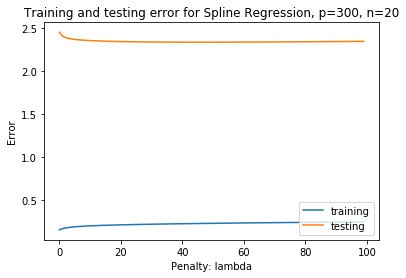

In [4]:
### Plotting
plt.figure(2)
plt.title('Training and testing error for Spline Regression, p=300, n=20')
plt.xlabel('Penalty: lambda')
plt.ylabel('Error')
plt.plot(train_errs, label='training')
plt.plot(test_errs, label='testing')
plt.legend(loc='lower right')
plt.savefig("4-1.png")

The training error and testing error is showed. As the amount of penalty $\lambda$ increase, training error keeps increasing, because bias is added and parameters are shrinked. Whereas, the testing error decrease and than increase. It indicates that spline with too small penalty tends to overfit as we discussed before, and too larger $\lambda$ leads to underfit due to too much bias. Therefore, a tradeoff between bias and variance is necessary.

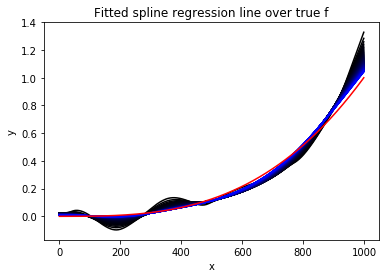

In [5]:
from matplotlib import colors
cdict = np.linspace(0,1,num=100)
plt.title('Fitted spline regression line over true f')
plt.xlabel('x')
plt.ylabel('y')
for i in range(100):
    plt.plot(yhats[i], c=(0,0,cdict[i]))
plt.plot(ytrue, c=(1,0,0))
plt.savefig("4-2.png")

The spline regression is fitted with $\lambda=0.11$, which minimizes the testing error. The blue fitted line is indeed close to the truth. Nevertheless, in real application we shall use cross validation with multiple folds to get a more stable choice.

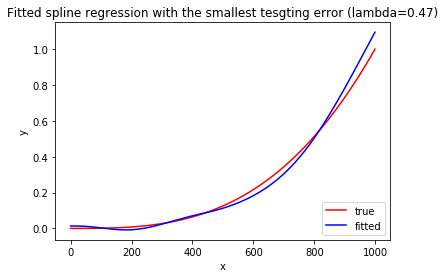

In [6]:
plt.title('Fitted spline regression with the smallest tesgting error (lambda=0.47)')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(ytrue, c=(1,0,0), label='true')
plt.plot(yhats[np.argmin(test_errs)], c=(0,0,1), label='fitted')
plt.legend(loc='lower right')
plt.savefig("4-3.png")